In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [93]:
x=df_train.copy()
y=df_test.copy()

In [94]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [95]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [98]:
useless_cols=['Alley','PoolQC','Fence','MiscFeature']
train=df_train.drop(useless_cols,axis=1)
test=df_test.drop(useless_cols,axis=1)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [99]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


### Target variable is Saleprice

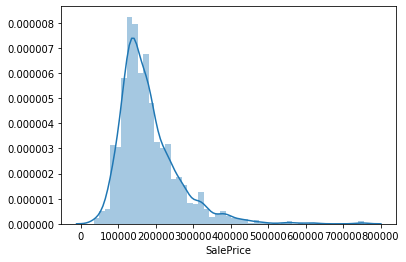

In [8]:
sns.distplot(df_train['SalePrice'])

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [13]:
df_train["LotFrontage"].fillna(df_train['LotFrontage'].mean(),inplace=True)

In [100]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),inplace=True)

In [101]:
df_train_corr = df_train.select_dtypes(include=[np.number])    #this shows correlation between numerical values columns
df_train_corr.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [15]:
df_train_corr.shape

(1460, 38)

In [16]:
del df_train_corr["Id"]


In [104]:
df_test.shape

(1459, 80)

In [17]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [18]:
cols=['BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','Utilities','Street','LotShape','LandContour','LandSlope','FireplaceQu']

In [19]:
cols

['BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr',
 'Utilities',
 'Street',
 'LotShape',
 'LandContour',
 'LandSlope',
 'FireplaceQu']

In [119]:
train.drop(cols,axis=1,inplace=True)

In [120]:
test.drop(cols,axis=1,inplace=True)

KeyError: "['BsmtFinSF2' 'BsmtHalfBath' 'MiscVal' 'Id' 'LowQualFinSF' 'YrSold'\n 'OverallCond' 'MSSubClass' 'EnclosedPorch' 'KitchenAbvGr' 'Utilities'\n 'Street' 'LotShape' 'LandContour' 'LandSlope' 'FireplaceQu'] not found in axis"

In [121]:
train_corr = train.select_dtypes(include=[np.number])
train_corr.shape

(1460, 29)

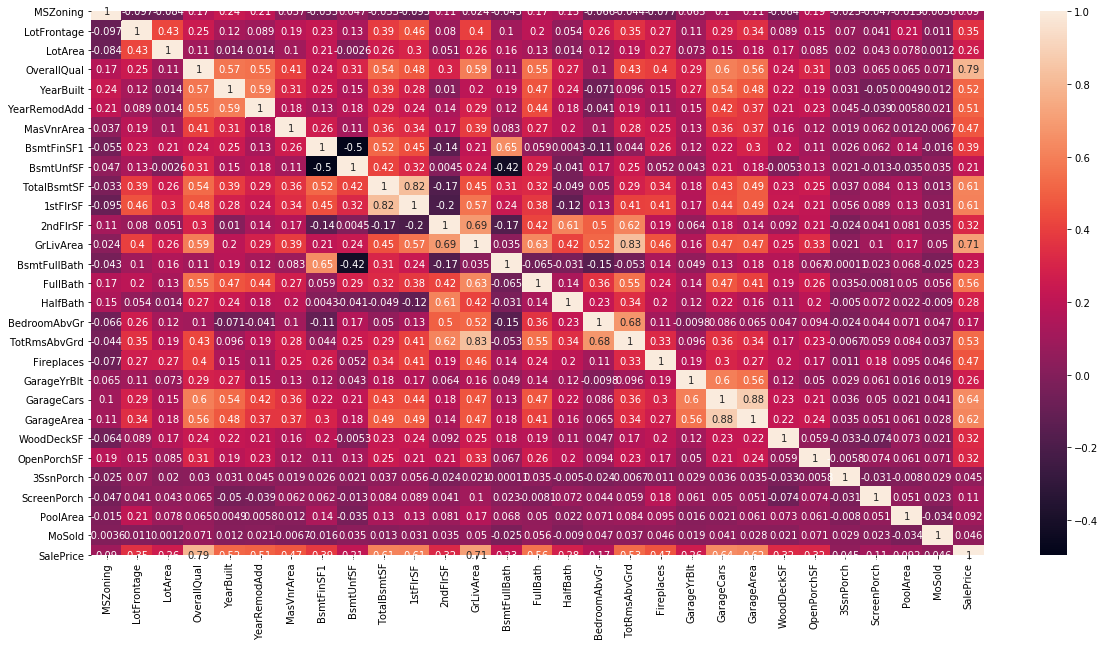

In [122]:
corr = train_corr.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True)

### Top feature having more than 50% correlation with target variable

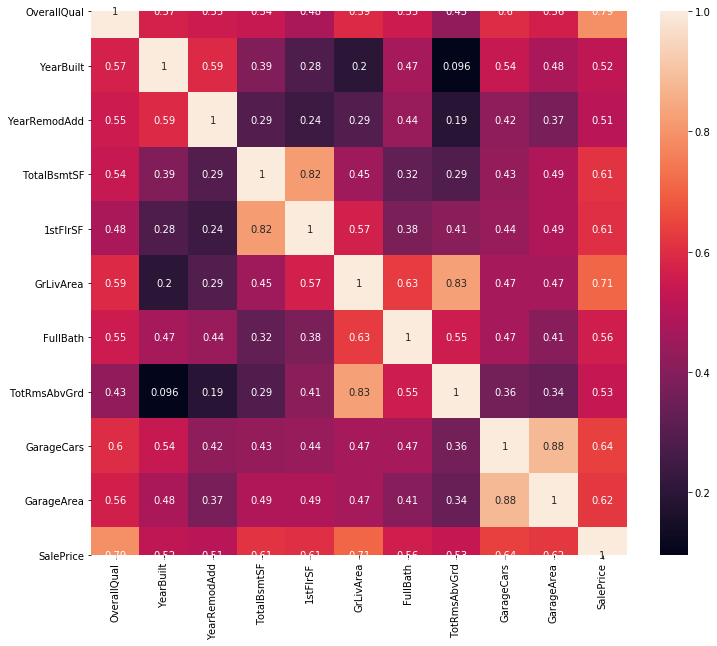

In [123]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 10))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [124]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [125]:
train.MSZoning=pd.get_dummies(train['MSZoning'],drop_first=True)
test.MSZoning=pd.get_dummies(test['MSZoning'],drop_first=True)


In [126]:
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [127]:
test['LotFrontage'] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [128]:
col1=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrType']

In [129]:
for col in col1:
     train[col] = train[col].fillna('None')

In [130]:
for col in col1:
    test[col]=test[col].fillna('None')

In [131]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea']:
    train[col] = train[col].fillna(int(0))

In [132]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea']:
    test[col] = test[col].fillna(int(0))

In [133]:
train.head()

,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,0,65.0,8450,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,Y,0,61,0,0,0,2,WD,Normal,208500
1,0,80.0,9600,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,Y,298,0,0,0,0,5,WD,Normal,181500
2,0,68.0,11250,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,Y,0,42,0,0,0,9,WD,Normal,223500
3,0,60.0,9550,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,Y,0,35,0,0,0,2,WD,Abnorml,140000
4,0,84.0,14260,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,Y,192,84,0,0,0,12,WD,Normal,250000


In [117]:
test.head()

,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition
0,0,80.0,11622,Inside,NAmes,Feedr,Norm,1Fam,1Story,5,...,TA,Y,140,0,0,120,0,6,WD,Normal
1,0,81.0,14267,Corner,NAmes,Norm,Norm,1Fam,1Story,6,...,TA,Y,393,36,0,0,0,6,WD,Normal
2,0,74.0,13830,Inside,Gilbert,Norm,Norm,1Fam,2Story,5,...,TA,Y,212,34,0,0,0,3,WD,Normal
3,0,78.0,9978,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,...,TA,Y,360,36,0,0,0,6,WD,Normal
4,0,43.0,5005,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,8,...,TA,Y,0,82,0,144,0,1,WD,Normal


In [135]:
train['3SsnPorch'].unique
train['ScreenPorch'].unique
train['PoolArea'].unique                  #as all values are 0 ,we can delete this column
train.drop(['3SsnPorch','ScreenPorch','PoolArea'],axis=1,inplace=True)

In [136]:
test['3SsnPorch'].unique
test['ScreenPorch'].unique
test['PoolArea'].unique                  #as all values are 0 ,we can delete this column
test.drop(['3SsnPorch','ScreenPorch','PoolArea'],axis=1,inplace=True)

In [137]:
train[train.columns[11:30]].head()

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating
0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA
1,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA
2,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA
3,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA
4,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA


In [138]:
train[train.columns[31:50]].head()

,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
0,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA
1,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA
2,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA
3,Y,SBrkr,961,756,1717,1,1,0,3,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA
4,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA


In [139]:
train[train.columns[50:62]].head()

,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice
0,TA,Y,0,61,2,WD,Normal,208500
1,TA,Y,298,0,5,WD,Normal,181500
2,TA,Y,0,42,9,WD,Normal,223500
3,TA,Y,0,35,2,WD,Abnorml,140000
4,TA,Y,192,84,12,WD,Normal,250000


In [140]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [36]:
train.Electrical.unique

<bound method Series.unique of 0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object>

In [141]:
test['Electrical'] = test['Electrical'].fillna(test['Electrical']).mode()[0]

In [144]:
test.drop(['FireplaceQu'],axis=1,inplace=True)

KeyError: "['FireplaceQu'] not found in axis"

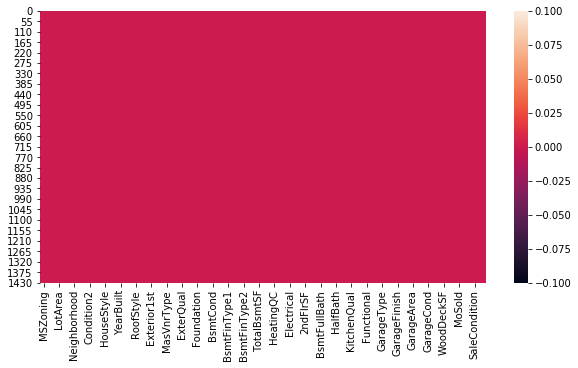

In [145]:
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())          #so there is no null value now

In [146]:
col2 = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish',
        'PavedDrive',  'CentralAir',
         'MoSold', 'MSZoning', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType',
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [147]:
from sklearn.preprocessing import LabelEncoder
for c in col2:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [148]:
for c in col2:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [149]:
train.head()

,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice
0,0,65.0,8450,4,5,2,2,0,5,7,...,548,5,5,2,0,61,1,8,4,208500
1,0,80.0,9600,2,24,1,2,0,2,6,...,460,5,5,2,298,0,4,8,4,181500
2,0,68.0,11250,4,5,2,2,0,5,7,...,608,5,5,2,0,42,8,8,4,223500
3,0,60.0,9550,0,6,2,2,0,5,7,...,642,5,5,2,0,35,1,8,0,140000
4,0,84.0,14260,2,15,2,2,0,5,8,...,836,5,5,2,192,84,11,8,4,250000


In [150]:
test.head()

,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition
0,0,80.0,11622,4,12,1,2,0,2,5,...,1,730.0,4,5,2,140,0,5,8,4
1,0,81.0,14267,0,12,2,2,0,2,6,...,1,312.0,4,5,2,393,36,5,8,4
2,0,74.0,13830,4,8,2,2,0,4,5,...,2,482.0,4,5,2,212,34,2,8,4
3,0,78.0,9978,4,8,2,2,0,4,6,...,2,470.0,4,5,2,360,36,5,8,4
4,0,43.0,5005,4,22,2,2,4,2,8,...,2,506.0,4,5,2,0,82,0,8,4


In [151]:
test.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
LotConfig        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

In [153]:
test['BsmtFinSF1']
test.BsmtFinSF1.fillna(test.BsmtFinSF1.mean(),inplace=True)

In [155]:
test['BsmtUnfSF']
test.BsmtUnfSF.fillna(test.BsmtUnfSF.mean(),inplace=True)

In [157]:
test['TotalBsmtSF']
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean(),inplace=True)

In [161]:
test['BsmtFullBath'].isnull().sum()
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(int(0))

In [162]:
y=train['SalePrice']

In [163]:
del train['SalePrice']

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=7)

In [165]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [166]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
pred=model.predict(x_test)

In [168]:
model.score(x_test,y_test)

0.8254606873744325

In [169]:
from sklearn.metrics import r2_score

In [170]:
r2_score(y_test,pred)

0.8254606873744325

In [171]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [172]:
import statsmodels.api as sm
from scipy import stats

In [173]:
model1=sm.OLS(y_train,x_train)

result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              650.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        09:32:08   Log-Likelihood:                         -12033.
No. Observations:                1022   AIC:                                  2.418e+04
Df Residuals:                     966   BIC:                                  2.445e+04
Df Model:                          56                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [174]:
rss=((y_test-pred)**2).sum()


In [175]:
mse=np.mean((y_test-pred)**2)
mse

1269273550.956735

In [176]:
print("Final rmse value is =",np.sqrt(np.mean((y_test-pred)**2)))


Final rmse value is = 35626.865578615456


In [178]:
test.head()

,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition
0,0,80.0,11622,4,12,1,2,0,2,5,...,1,730.0,4,5,2,140,0,5,8,4
1,0,81.0,14267,0,12,2,2,0,2,6,...,1,312.0,4,5,2,393,36,5,8,4
2,0,74.0,13830,4,8,2,2,0,4,5,...,2,482.0,4,5,2,212,34,2,8,4
3,0,78.0,9978,4,8,2,2,0,4,6,...,2,470.0,4,5,2,360,36,5,8,4
4,0,43.0,5005,4,22,2,2,4,2,8,...,2,506.0,4,5,2,0,82,0,8,4


In [182]:
test[test.columns[31:50]].head()

,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
0,1,0,896,0,896,0.0,1,0,2,3,5,6,0,1,1961.0,3,1,730.0,4
1,1,0,1329,0,1329,0.0,1,1,3,2,6,6,0,1,1958.0,3,1,312.0,4
2,1,0,928,701,1629,0.0,2,1,3,3,6,6,1,1,1997.0,0,2,482.0,4
3,1,0,926,678,1604,0.0,2,1,3,2,7,6,1,1,1998.0,0,2,470.0,4
4,1,0,1280,0,1280,0.0,2,0,2,2,5,6,0,1,1992.0,2,2,506.0,4


In [186]:
test[test.columns[11:31]].head()

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC
0,1961,1,0,10,12,2,0,3,4,1,4,4,3,5,468.0,3,270.0,882.0,0,4
1,1958,3,0,11,13,1,58,3,4,1,4,4,3,0,923.0,6,406.0,1329.0,0,4
2,1998,1,0,10,12,2,0,3,4,2,2,4,3,2,791.0,6,137.0,928.0,0,2
3,1998,1,0,10,12,1,6,3,4,2,4,4,3,2,602.0,6,324.0,926.0,0,0
4,1992,1,0,6,6,2,0,2,4,2,2,4,3,0,263.0,6,1017.0,1280.0,0,0


In [185]:
test[test.columns[49:61]].head()

,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition
0,4,5,2,140,0,5,8,4
1,4,5,2,393,36,5,8,4
2,4,5,2,212,34,2,8,4
3,4,5,2,360,36,5,8,4
4,4,5,2,0,82,0,8,4


In [188]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
LotConfig        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
MasVnrType       1459 non-null int64
MasVnrArea       1459 non-null int64
ExterQual        1459 non-null int64
ExterCond        1459 non-null int64
Foundation       1459 non-null int64
BsmtQual         1459 non-null int64
BsmtCond         1459 non-null int64
BsmtExposure     1459 non-null int64
Bsm

In [191]:
test['GarageCars']

0       1
1       1
2       2
3       2
4       2
       ..
1454    0
1455    1
1456    2
1457    0
1458    3
Name: GarageCars, Length: 1459, dtype: object

In [199]:
test.replace(to_replace ="None", 
                 value =0.0,inplace=True) 

In [200]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
LotConfig        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
MasVnrType       1459 non-null int64
MasVnrArea       1459 non-null int64
ExterQual        1459 non-null int64
ExterCond        1459 non-null int64
Foundation       1459 non-null int64
BsmtQual         1459 non-null int64
BsmtCond         1459 non-null int64
BsmtExposure     1459 non-null int64
Bsm

In [201]:
y_pred=model.predict(test)

In [60]:
x_train.shape

(1022, 60)

In [202]:
sub=pd.read_csv('sample_submission.csv')

In [203]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [205]:
sub_id=sub['Id']

In [206]:
dict={"Id":sub_id,"SalePrice":y_pred}

In [207]:
df=pd.DataFrame(dict)

In [208]:
df.to_csv("submission.csv",index=False)

In [62]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C9346DD68>,
      dtype=object)

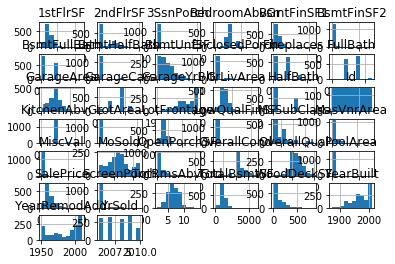

In [63]:
df_train.hist()

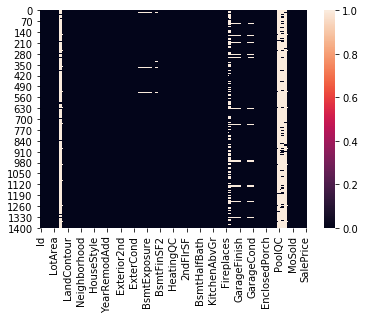

In [64]:
sns.heatmap(df_train.isnull())

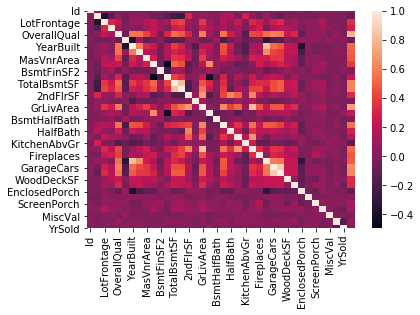

In [65]:
sns.heatmap(df_train.corr())

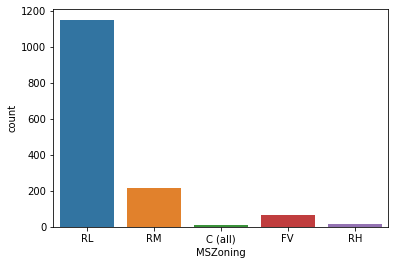

In [66]:
sns.countplot(df_train['MSZoning'])

In [67]:
df_train.drop("Alley",axis=1,inplace=True)

In [68]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


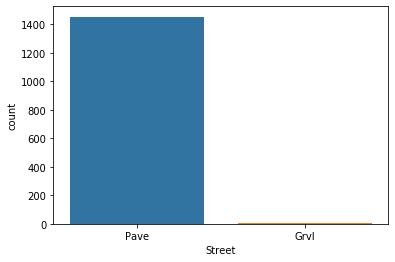

In [69]:
sns.countplot(df_train['Street'])       #we can drop this column

In [70]:
df_train.drop("Street",axis=1,inplace=True)

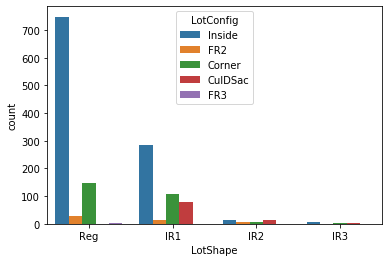

In [71]:
sns.countplot(df_train['LotShape'],hue=df_train['LotConfig']) 

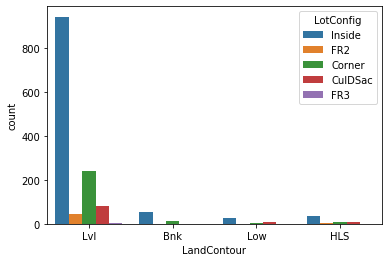

In [72]:
sns.countplot(df_train['LandContour'],hue=df_train['LotConfig']) 

In [73]:
#we can drop landshape and landContour
df_train.drop(['LotShape','LandContour'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,AllPub,Inside,Gtl,CollgCr,Norm,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,AllPub,Corner,Gtl,Crawfor,Norm,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,AllPub,FR2,Gtl,NoRidge,Norm,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,AllPub,Inside,Gtl,Gilbert,Norm,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,AllPub,Inside,Gtl,NWAmes,Norm,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,AllPub,Inside,Gtl,Crawfor,Norm,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,AllPub,Inside,Gtl,NAmes,Norm,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


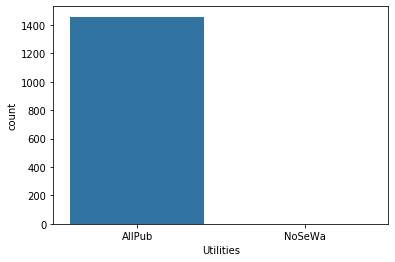

In [74]:
sns.countplot(df_train['Utilities']) #we can drop this

In [75]:
df_train.drop(['Utilities'],axis=1,inplace=True)

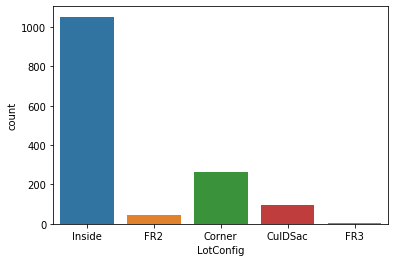

In [76]:
sns.countplot(df_train['LotConfig'])  #label encoding

In [77]:
df_train.drop(['LandSlope'],axis=1,inplace=True)

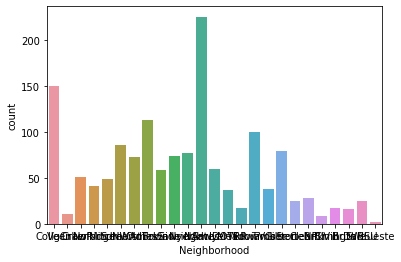

In [78]:
sns.countplot(df_train["Neighborhood"])

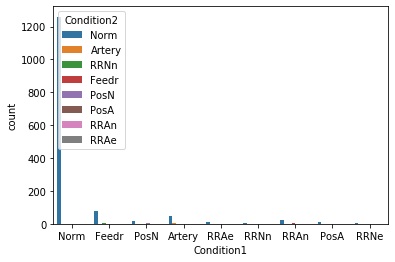

In [79]:
sns.countplot(df_train["Condition1"],hue=df_train["Condition2"])

In [80]:
df_train.Condition1

0        Norm
1       Feedr
2        Norm
3        Norm
4        Norm
        ...  
1455     Norm
1456     Norm
1457     Norm
1458     Norm
1459     Norm
Name: Condition1, Length: 1460, dtype: object

In [81]:
df_train.Condition1=pd.get_dummies(df_train["Condition1"],drop_first=False)
df_train.Condition1.head()

0    0
1    0
2    0
3    0
4    0
Name: Condition1, dtype: uint8

In [82]:
df_train.drop(['Condition2'],axis=1,inplace=True)

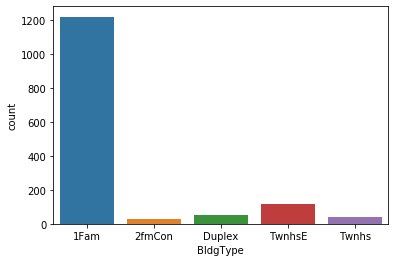

In [83]:
sns.countplot(df_train.BldgType)

In [84]:
df_train.BldgType=pd.get_dummies(df_train['BldgType'],drop_first=True)

In [85]:
df_train.BldgType.head()

0    0
1    0
2    0
3    0
4    0
Name: BldgType, dtype: uint8

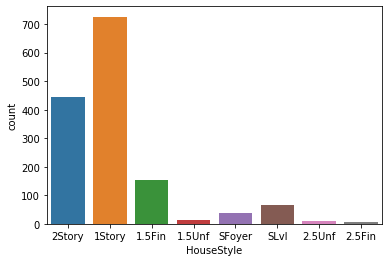

In [86]:
sns.countplot("HouseStyle",data=df_train)

In [87]:
df_train.drop(['OverallQual'],axis=1,inplace=True)

In [88]:
df_train[df_train.columns[13:25]].head()

,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual
0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd
1,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd
2,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd
3,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA
4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd


In [89]:
df_train.drop('YearBuilt',axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,0,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,0,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,0,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,0,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,0,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,0,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,0,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,NAmes,0,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [90]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,0,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,0,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,0,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,0,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
